### R&D Spending

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt

### Using NCSES Data:

The NCSES releases R&D spending by performer and year, as a % of GDP <a href="https://ncses.nsf.gov/data-collections/national-patterns/2021"> here </a>

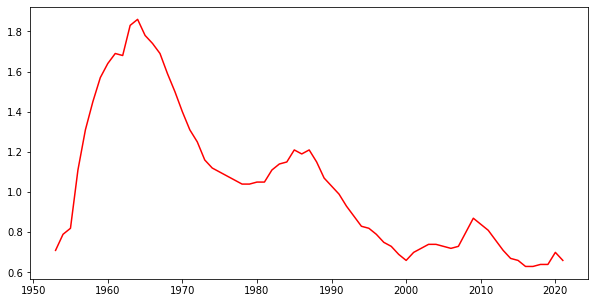

In [19]:
df = pd.read_excel("ncses_full.xlsx", skiprows=5) 
df = df.iloc[:, [0,12]] # Selecting by index because of the weird column names
df.columns = ["Year", "R&D"] # Renaming columns
df["Year"] = df["Year"].astype(str).str[0:4].astype(int) # Removing notes from years by converting to string, extracting first 4 chars and then back to int
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df["Year"], df["R&D"], color="red")

ncses_df = df.copy()
ncses_df.rename(columns={"R&D": "NCSES"}, inplace=True)


## Other Sets:

### Including R&D Plant 
The NCSES also releases R&D spending by performer and year, including R&D plant, as a % of GDP <a href="https://ncses.nsf.gov/data-collections/federal-budget-function/2023"> here </a>

/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


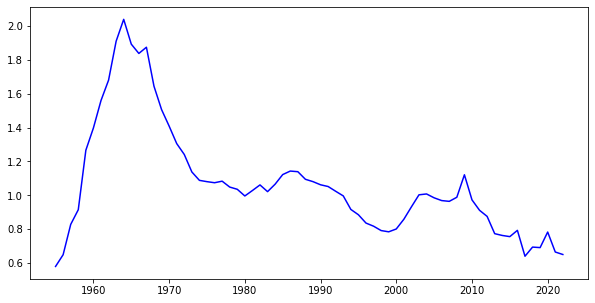

In [20]:
df = pd.read_excel("by Function - NCSES.xlsx", skiprows=4)
df = df.iloc[:, :2]
df.columns = ['Year', 'Total']
df['Total'] = df['Total'].astype(float)*10**6 # Millions of Dollars
df["Year"] = df["Year"].astype(str).str[0:4].astype(int, errors='ignore') # Removing notes from years by converting to string, extracting first 4 chars and then back to int
# Drop rows with non numeric values
df = df[df['Year'].apply(lambda x: len(x) == 4 and x.isnumeric())]
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.dropna(inplace=True)

gdp_df = pd.read_excel("GDP.xls", skiprows=10)
gdp_df.rename(columns={'observation_date': 'Year'}, inplace=True)
gdp_df['GDP'] = gdp_df['GDP'].astype(float)*10**9 # Billions of Dollars
gdp_df.head()

df = df.merge(gdp_df, on='Year')
df['rel_GDP'] = df['Total']/df['GDP']*100

fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(df["Year"], df["rel_GDP"], color="blue")

ncses_plant_df = df[['Year','rel_GDP']].copy()
ncses_plant_df.rename(columns={'rel_GDP': 'NCSES_plant'}, inplace=True)



### AAAS Data
The American Association for the Advancement of Science also releases a series: <a href="https://www.aaas.org/programs/r-d-budget-and-policy/historical-trends-federal-rd"> here ("National R&D By Funder, 1953-2020") </a>. 


In [21]:
df = pd.read_excel("AAAs - USFund1.xls", skiprows=3)
df = df.iloc[:, [0,10]]
df.columns = ["Year", "AAAS"]
df['Year'] = pd.to_datetime(df['Year'], format='%Y', errors='coerce')
df = df.iloc[:-1, :]

In [22]:
df.dtypes

Year    datetime64[ns]
AAAS           float64
dtype: object

In [23]:

AAAS_df = df.copy()

# plot using altair


In [24]:
df = pd.merge(ncses_df, ncses_plant_df, on='Year')
df = pd.merge(df, AAAS_df, on='Year')
df['NCSES'] = df['NCSES']/100
df['NCSES_plant'] = df['NCSES_plant']/100
df.rename(columns={'NCSES_plant': 'NCES (incl. R&D Plant)'}, inplace=True)
df = df.melt(id_vars=['Year'], var_name='Source', value_name='Value')
df = df.dropna()
df

,Year,Source,Value
0,1955-01-01,NCSES,0.008200
1,1956-01-01,NCSES,0.011100
2,1957-01-01,NCSES,0.013100
3,1958-01-01,NCSES,0.014500
4,1959-01-01,NCSES,0.015700
...,...,...,...
193,2016-01-01,AAAS,0.003153
194,2017-01-01,AAAS,0.003045
195,2018-01-01,AAAS,0.003129
196,2019-01-01,AAAS,0.003182


In [25]:

all_series_chart = alt.Chart(df).mark_line().encode(
    x= alt.X('Year:T',
             axis=alt.Axis(
                    format='%Y',
                    ticks=False,
                    labelPadding=6,
                    title=None,
                    gridOpacity=0)
        ),
    y= alt.Y('Value:Q',
        axis=alt.Axis(
            format='.1%',
            ticks=False,
            labelPadding=6,
            title=None,
            gridOpacity=0.6
            ),
        ),
    color= alt.Color('Source:N',
        legend=alt.Legend(
            title=None,
            labelLimit=2000,
            orient='none',
            legendX=-30,
            legendY=-20,
            direction='horizontal'),
        scale=alt.Scale(
            scheme='tableau10')
    )
).properties(
    width=600,
    height=400,
    title= {
        "text": ["US Federal R&D Spending as a Percentage of GDP"],
        "subtitle": ["Source: AAAS, NCSES"],
    }
).configure_title(
    fontSize=16,
    subtitleFontSize=12,
    align='left',
    anchor='start',
    fontWeight='bold',
    font='Arial')

all_series_chart.display()


alt.Chart(...)

In [26]:


AAAS_chart = alt.Chart(df.query('Source == "AAAS"')).mark_line().encode(
    x= alt.X('Year:T',
             axis=alt.Axis(
                    format='%Y',
                    ticks=False,
                    labelPadding=6,
                    title=None,
                    gridOpacity=0)
        ),
    y= alt.Y('Value:Q',
        axis=alt.Axis(
            format='.1%',
            ticks=False,
            labelPadding=6,
            title=None,
            gridOpacity=0.6
            ),
        ),
    color= alt.Color('Source:N',
        legend=None,
        scale=alt.Scale(
            scheme='tableau10')
    )
).properties(
    width=600,
    height=400,
    title= {
        "text": ["US Federal R&D Spending as a Percentage of GDP"],
        "subtitle": ["Source: AAAS"],
    }
).configure_title(
    fontSize=16,
    subtitleFontSize=12,
    align='left',
    anchor='start',
    fontWeight='bold',
    font='Arial')

AAAS_chart.display()




alt.Chart(...)

In [27]:


NCSES_plant_chart = alt.Chart(df.query('Source == "NCES (incl. R&D Plant)"')).mark_line().encode(
    x= alt.X('Year:T',
             axis=alt.Axis(
                    format='%Y',
                    ticks=False,
                    labelPadding=6,
                    title=None,
                    gridOpacity=0)
        ),
    y= alt.Y('Value:Q',
        axis=alt.Axis(
            format='.1%',
            ticks=False,
            labelPadding=6,
            title=None,
            gridOpacity=0.6
            ),
        ),
    color= alt.Color('Source:N',
        legend=None,
        scale=alt.Scale(
            scheme='tableau10')
    )
).properties(
    width=600,
    height=400,
    title= {
        "text": ["US Federal R&D Spending as a Percentage of GDP"],
        "subtitle": ["Includes R&D Plant Funding, Source: NCSES"],
    }
).configure_title(
    fontSize=16,
    subtitleFontSize=12,
    align='left',
    anchor='start',
    fontWeight='bold',
    font='Arial')

NCSES_plant_chart.display()




alt.Chart(...)

In [28]:


NCSES_plant_chart = alt.Chart(df.query('Source == "NCES (incl. R&D Plant)"')).mark_line().encode(
    x= alt.X('Year:T',
             axis=alt.Axis(
                    format='%Y',
                    ticks=False,
                    labelPadding=6,
                    title=None,
                    gridOpacity=0)
        ),
    y= alt.Y('Value:Q',
        axis=alt.Axis(
            format='.1%',
            ticks=False,
            labelPadding=6,
            title=None,
            gridOpacity=0.6
            ),
        ),
    color= alt.Color('Source:N',
        legend=None,
        scale=alt.Scale(
            scheme='tableau10')
    )
).properties(
    width=600,
    height=400,
    title= {
        "text": ["US Federal R&D Spending as a Percentage of GDP"],
        "subtitle": ["Includes R&D Plant Funding, Source: NCSES"],
    }
).configure_title(
    fontSize=16,
    subtitleFontSize=12,
    align='left',
    anchor='start',
    fontWeight='bold',
    font='Arial')

NCSES_plant_chart.display()


alt.Chart(...)

In [29]:


NCSES_chart = alt.Chart(df.query('Source == "NCSES"')).mark_line().encode(
    x= alt.X('Year:T',
             axis=alt.Axis(
                    format='%Y',
                    ticks=False,
                    labelPadding=6,
                    title=None,
                    gridOpacity=0)
        ),
    y= alt.Y('Value:Q',
        axis=alt.Axis(
            format='.1%',
            ticks=False,
            labelPadding=6,
            title=None,
            gridOpacity=0.6
            ),
        ),
    color= alt.Color('Source:N',
        legend=None,
        scale=alt.Scale(
            scheme='tableau10')
    )
).properties(
    width=600,
    height=400,
    title= {
        "text": ["US Federal R&D Spending as a Percentage of GDP"],
        "subtitle": ["Source: NCSES"],
    }
).configure_title(
    fontSize=16,
    subtitleFontSize=12,
    align='left',
    anchor='start',
    fontWeight='bold',
    font='Arial')

NCSES_plant_chart.display()




alt.Chart(...)

## Exporting the Data and Charts

In [30]:
df.to_csv('output/r&d_three_sources.csv', index=False)

all_series_chart.save('output/r&d_three_sources.png', scale_factor=2.0)
all_series_chart.save('output/r&d_three_sources.svg', scale_factor=2.0) # need to convert to eps manually - inkscape?

AAAS_chart.save('output/r&d_AAAS.png', scale_factor=2.0)
AAAS_chart.save('output/r&d_AAAS.svg', scale_factor=2.0)

NCSES_plant_chart.save('output/r&d_NCSES_plant.png', scale_factor=2.0)
NCSES_plant_chart.save('output/r&d_NCSES_plant.svg', scale_factor=2.0)

NCSES_chart.save('output/r&d_NCSES.png', scale_factor=2.0)
NCSES_chart.save('output/r&d_NCSES.svg', scale_factor=2.0)